# Function to Find Coefficients

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
def ar_coefficients(x, k):
    
    n = len(x)
    X = np.zeros((n-k, k))
    y = x[k:]
    for i in range(k):
        X[:,i] = x[k-i-1:n-i-1]
    model = LinearRegression().fit(X, y)
    a = np.concatenate(([1], -model.coef_))
    return a

# AR1 Process

In [2]:
import numpy as np

def generate_AR1(phi, sigma, n_samples): #phi is coeff, sigma is noise

    ts = [np.random.normal()]#start with random value

    for i in range(n_samples-1):
        noise = np.random.normal(scale=sigma)
        value = phi * ts[i] + noise
        ts.append(value)

    return ts

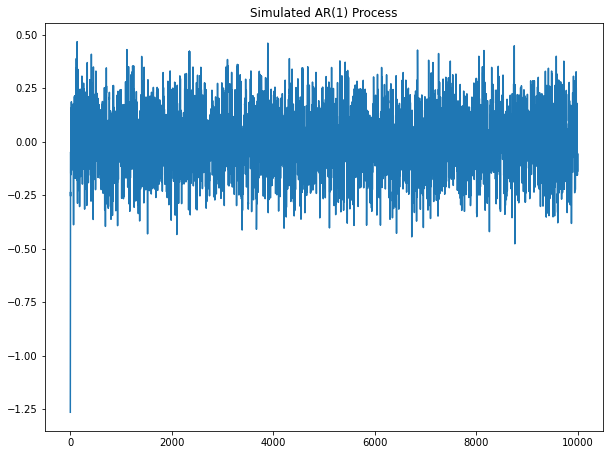

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

ts = generate_AR1(phi=0.67, sigma=0.1, n_samples=10000)
plt.figure(figsize=[10, 7.5]); 
plt.plot(ts)
plt.title("Simulated AR(1) Process")
plt.show()

In [4]:
ts
pd.DataFrame(ts).to_csv('AR1_data.csv') 

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf


C:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


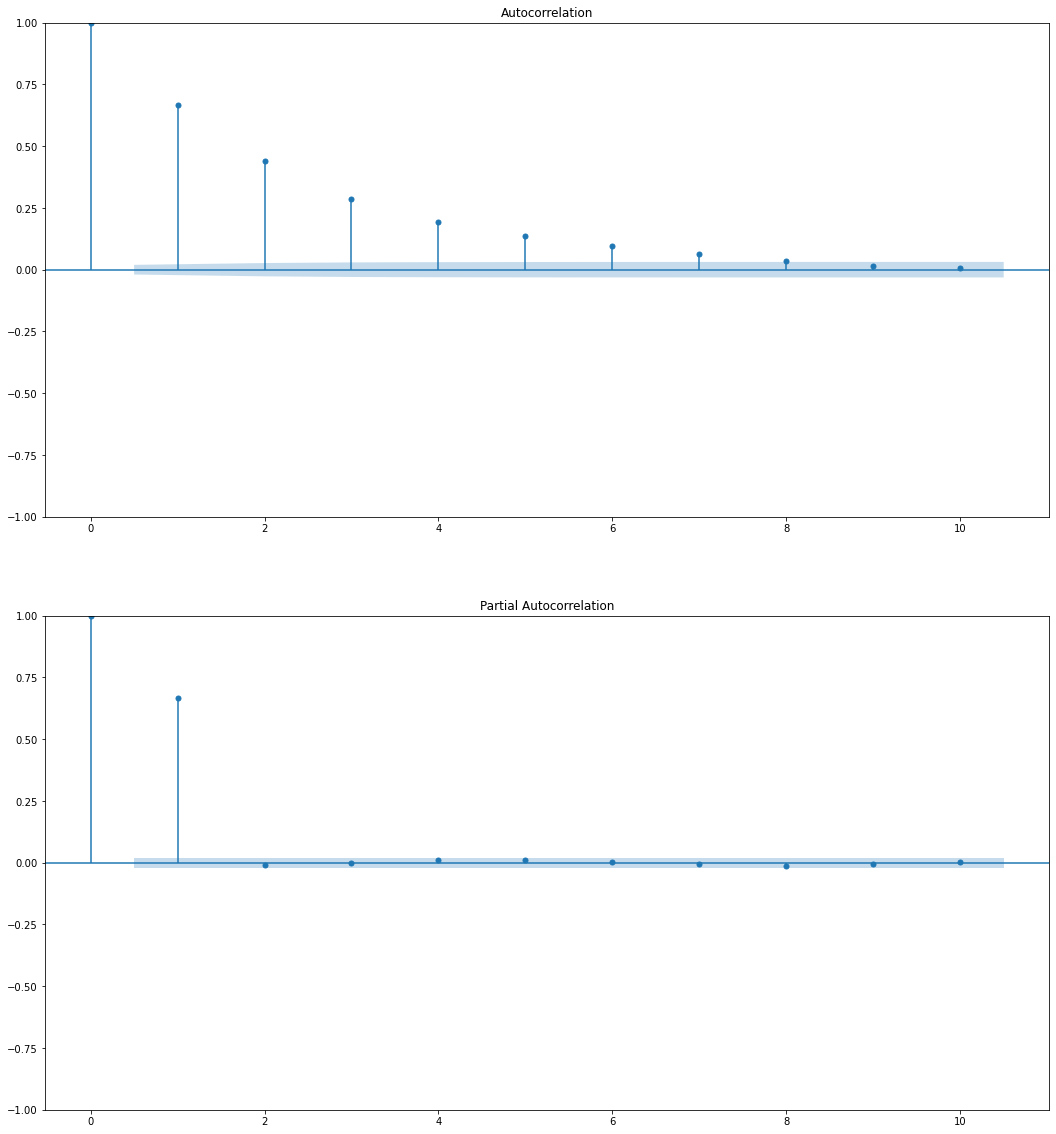

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(18, 20), sharey=True)

plot_acf(ax=axes[0], x=ts, lags=10)

plot_pacf(ax=axes[1], x=ts, lags=10)

plt.show()

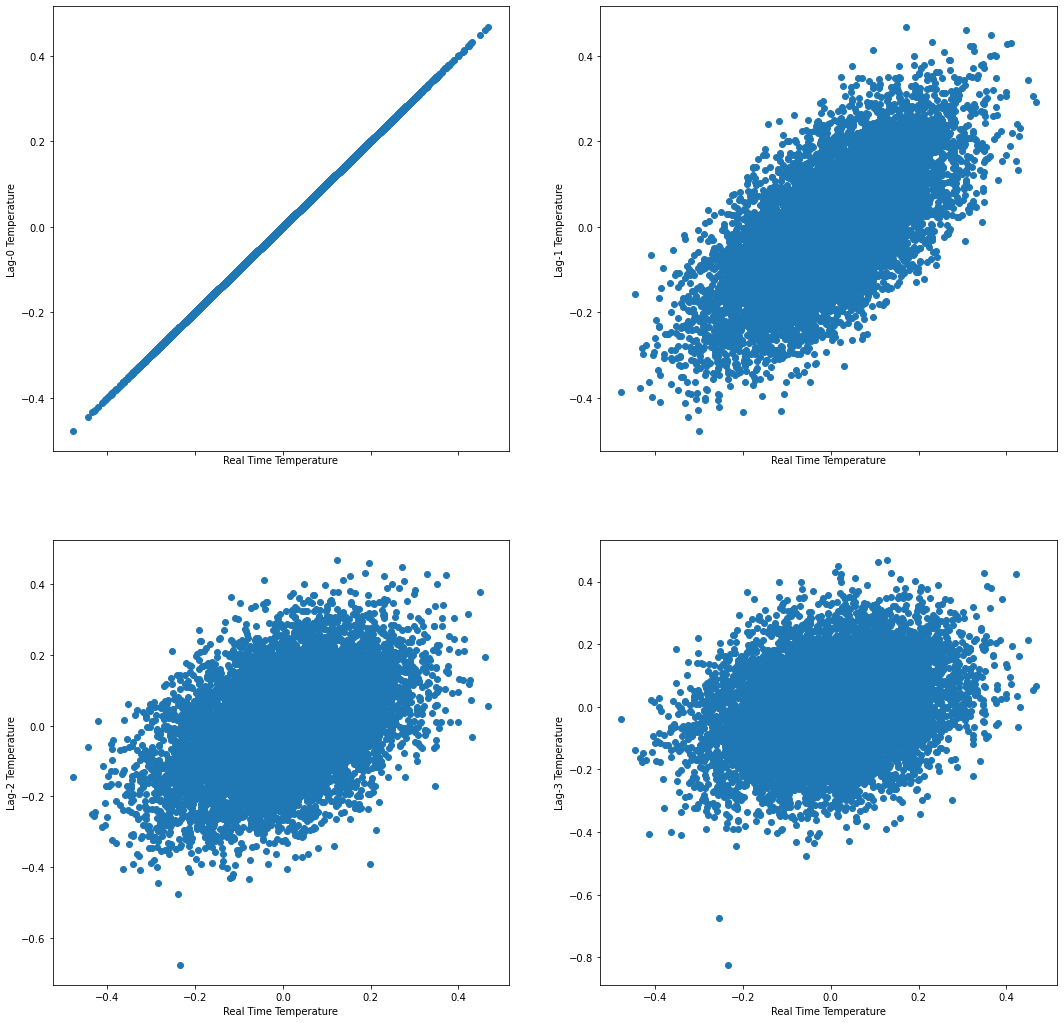

In [7]:
n = 4
current = ts[n:]
fig, axis = plt.subplots(2, n//2, sharex=True, figsize=(18, 18))

for i in range(n):
  if i != 0:
    lag = ts[(n-i):-i]
  else:
    lag = current
  axis[(i)//2, (i)%2].set(xlabel='Real Time Temperature', ylabel=f'Lag-{i} Temperature')
  axis[(i)//2, (i)%2].scatter(current, lag)

plt.show()

In [8]:
ar_coefficients(np.array(ts), 1)

array([ 1.        , -0.66642704])

# AR2 Process

In [9]:
def generate_AR2(phi1, phi2, sigma, n_samples): #phi is coeff, sigma is noise

    ts = [np.random.normal()]#start with random value
    ts.append(np.random.normal())
    for i in range(1, n_samples-2):
        noise = np.random.normal(scale=sigma)
        value = phi2*ts[i-1] + phi1*ts[i] + noise
        ts.append(value)

    return ts

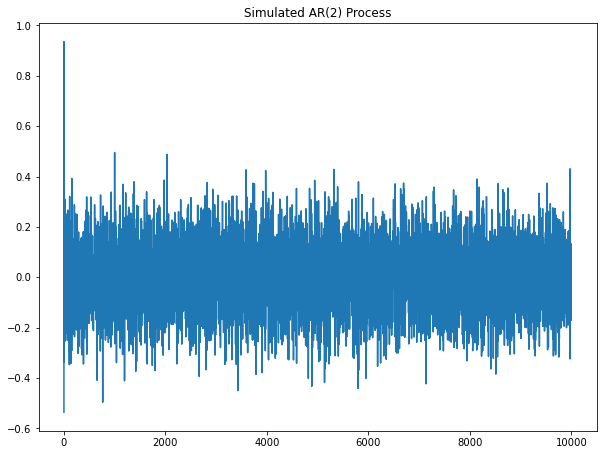

In [10]:
ts_ar2 = generate_AR2(phi1=0.7, phi2=-0.33, sigma=0.1, n_samples=10000)
plt.figure(figsize=[10, 7.5]);
plt.plot(ts_ar2)
plt.title("Simulated AR(2) Process")
plt.show()

C:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


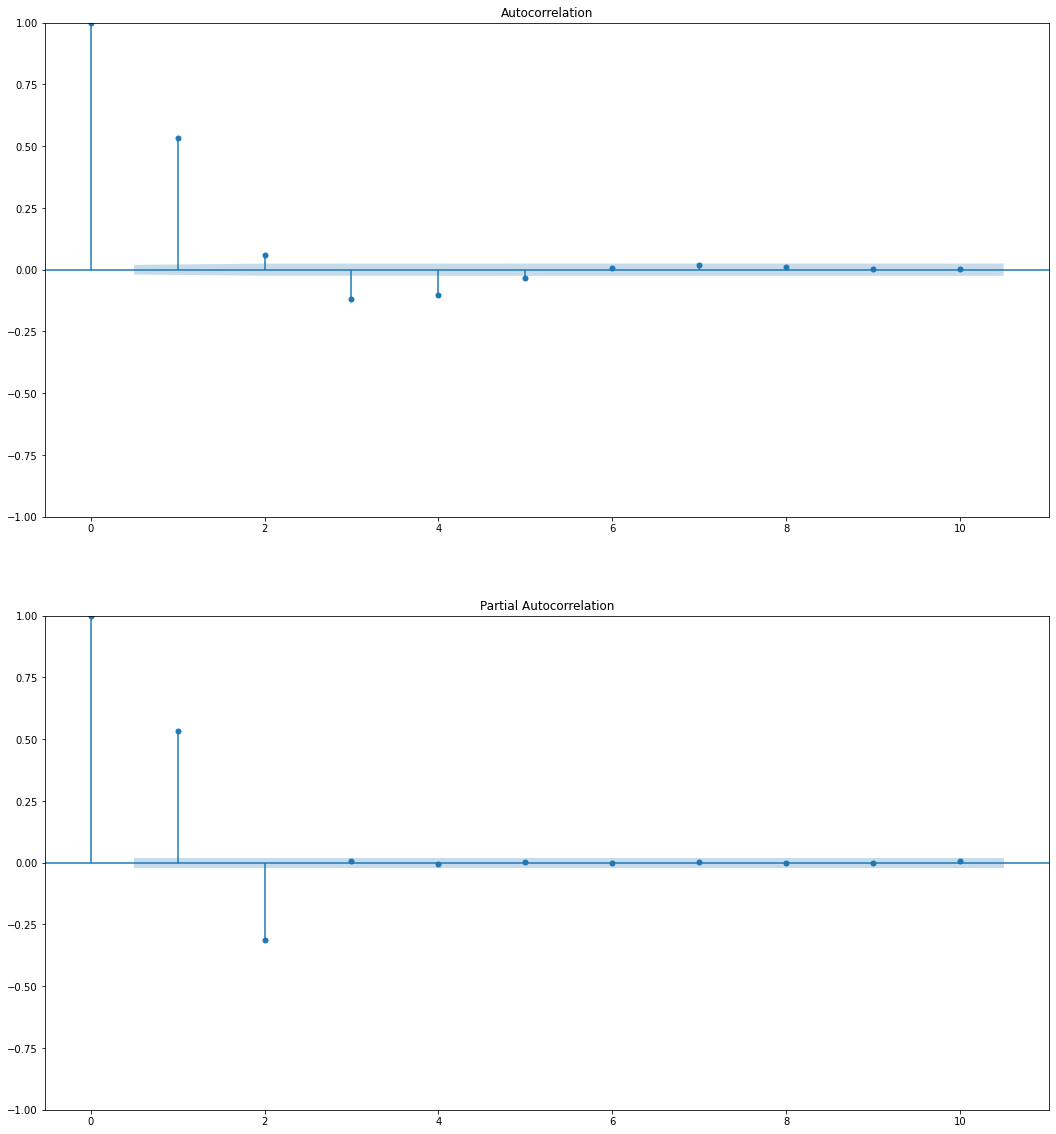

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(18, 20), sharey=True)

plot_acf(ax=axes[0], x=ts_ar2, lags=10)

plot_pacf(ax=axes[1], x=ts_ar2, lags=10)

plt.show()

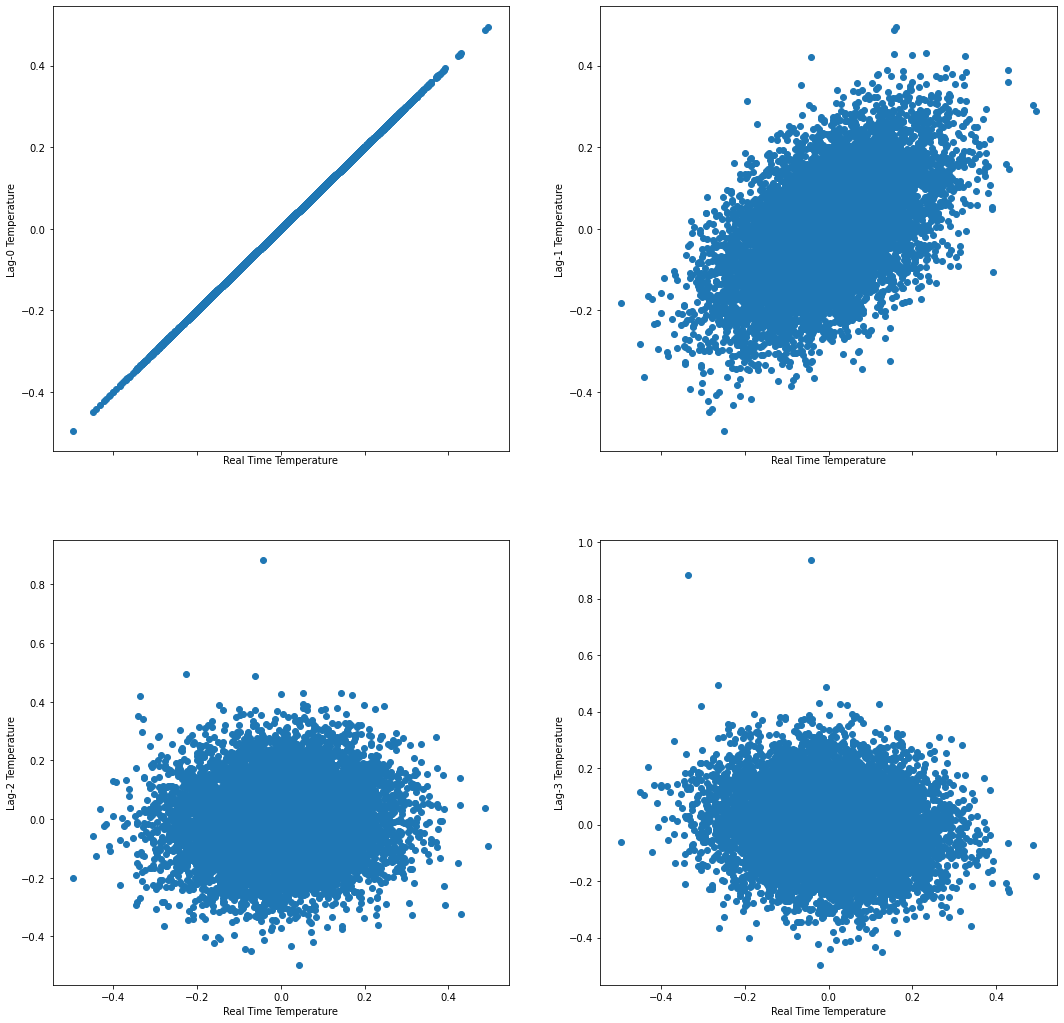

In [12]:
n = 4
current1 = ts_ar2[n:]
fig, axis = plt.subplots(2, n//2, sharex=True, figsize=(18, 18))

for i in range(n):
  if i != 0:
    lag = ts_ar2[(n-i):-i]
  else:
    lag = current1
  axis[(i)//2, (i)%2].set(xlabel='Real Time Temperature', ylabel=f'Lag-{i} Temperature')
  axis[(i)//2, (i)%2].scatter(current1, lag)

plt.show()

In [13]:
ar_coefficients(np.array(ts_ar2), 2)

array([ 1.        , -0.70581862,  0.315848  ])

# AR3 Process

In [14]:
def generate_AR3(phi1, phi2, phi3, sigma, n_samples): #phi is coeff, sigma is noise

    ts = [np.random.normal()]#start with random value
    ts.append(np.random.normal())
    for i in range(1, n_samples-2):
        noise = np.random.normal(scale=sigma)
        value = phi3*ts[i-2] + phi2*ts[i-1] + phi1*ts[i] + noise
        ts.append(value)

    return ts

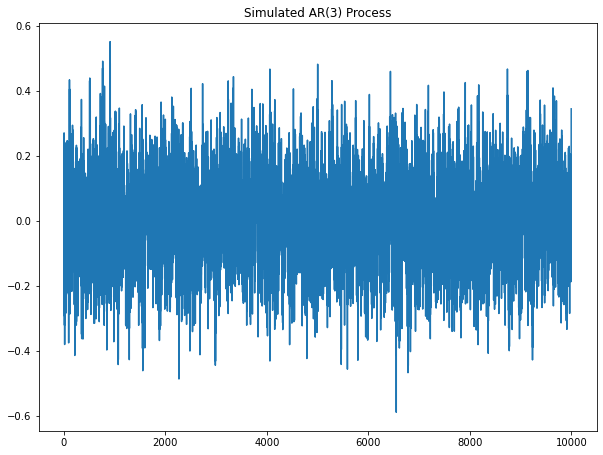

In [27]:
ts_ar3 = generate_AR3(phi1=0.1, phi2=-0.1, phi3=0.7, sigma=0.1, n_samples=10000)
plt.figure(figsize=[10, 7.5]);
plt.plot(ts_ar3)
plt.title("Simulated AR(3) Process")
plt.show()

C:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


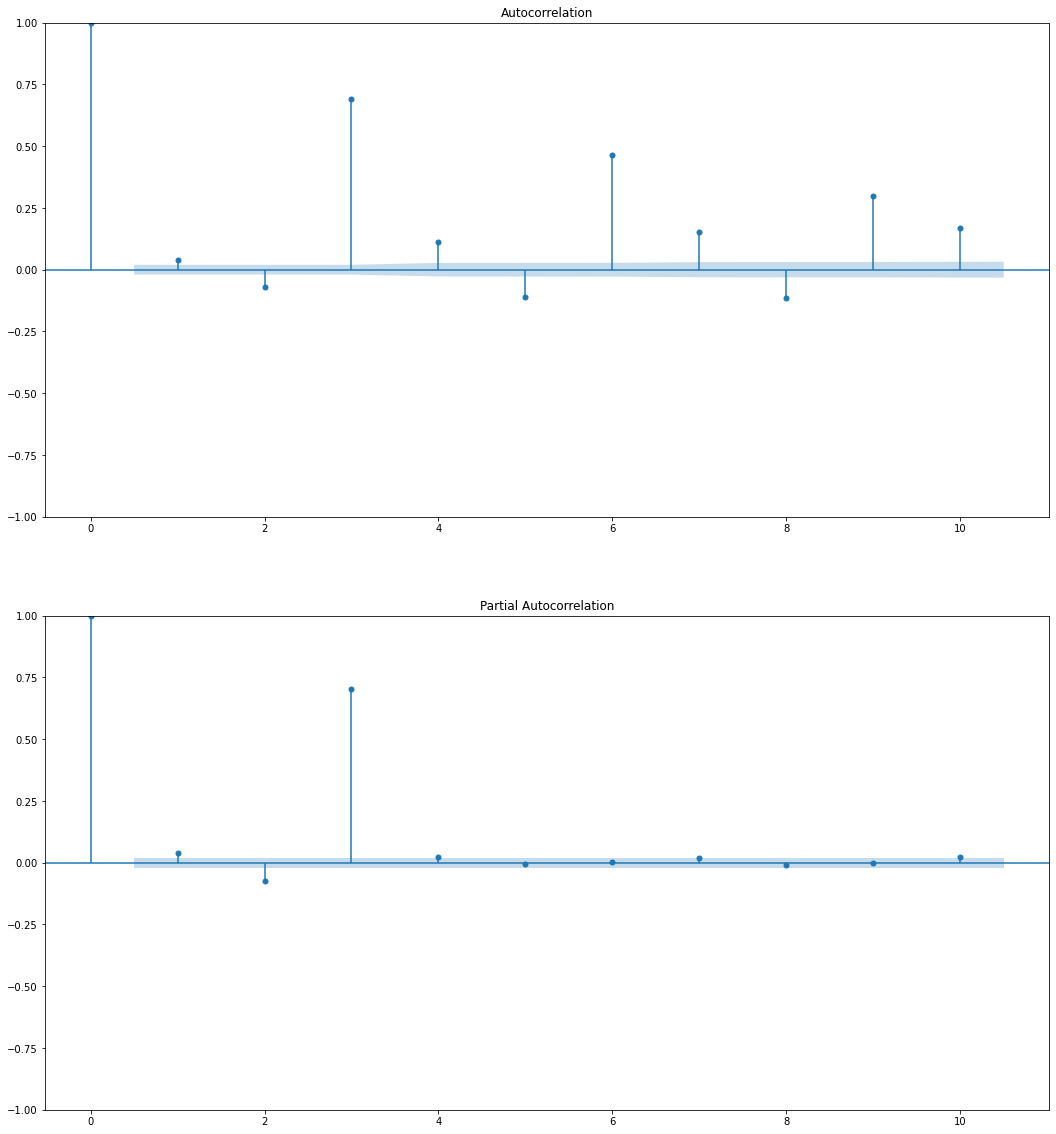

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(18, 20), sharey=True)

plot_acf(ax=axes[0], x=ts_ar3, lags=10)

plot_pacf(ax=axes[1], x=ts_ar3, lags=10)

plt.show()

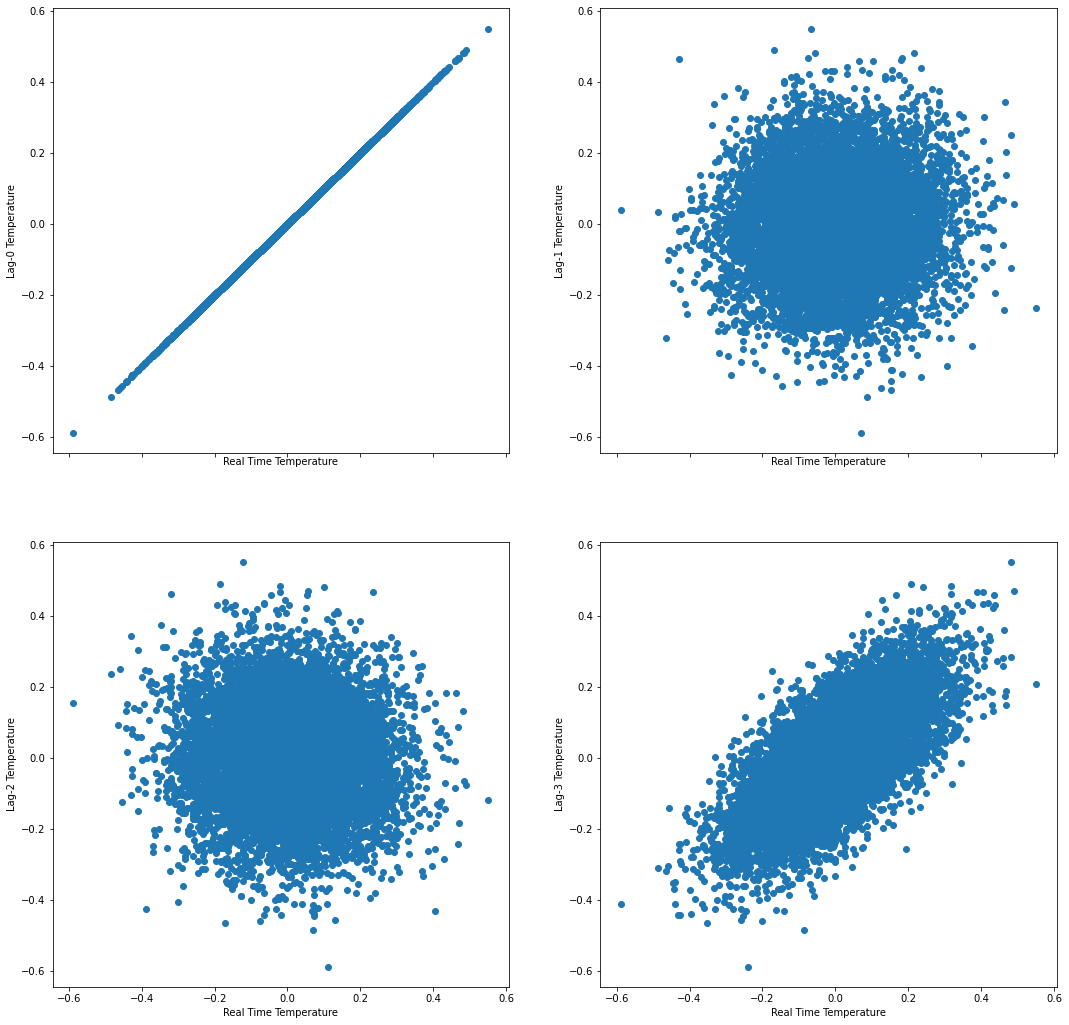

In [29]:
n = 4
current2 = ts_ar3[n:]
fig, axis = plt.subplots(2, n//2, sharex=True, figsize=(18, 18))

for i in range(n):
  if i != 0:
    lag = ts_ar3[(n-i):-i]
  else:
    lag = current2
  axis[(i)//2, (i)%2].set(xlabel='Real Time Temperature', ylabel=f'Lag-{i} Temperature')
  axis[(i)//2, (i)%2].scatter(current2, lag)

plt.show()

In [30]:
ar_coefficients(np.array(ts_ar3), 3)

array([ 1.        , -0.09491021,  0.10340167, -0.70292369])